# Analysis of the 'exams' database / Análisis de base "exams".

<center><img src = /work/Python.png width = 250></center>

## Exploratory analysis / Análisis exploratorio.

In [ ]:
# 1. Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Cargo datos para el "dataframe".
df = pd.read_csv('/work/exams.csv')
df

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


In [ ]:
# Las primeras 5 filas.
df.head()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


In [ ]:
# Las últimas 5 filas.
df.tail()


,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [ ]:
# Resumen Estadístico.
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [ ]:
# 3. Reviso tipo de datos.
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

In [ ]:
# Eliminar los duplicados.
print(f'Original: has {df.id.count()} rows.')
duplicate_rows_df = df[df.duplicated()]
print(f'Number of duplicated rows: {duplicate_rows_df.id.count()}.')

Original: has 1018 rows.
Number of duplicated rows: 18.


In [ ]:
# Elimino los duplicados.
df = df.drop_duplicates()
print(f'Number of rows after removing duplicates: {df.id.count()}.')

Number of rows after removing duplicates: 1000.


In [ ]:
# Eliminar columnas irrelevantes.
df.columns
df.drop(['id'], axis=1, inplace=True) # Por columna.

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [ ]:
# 6. Renombrar columnas.
df = df.rename(columns = {
    'gender': 'Gender' , 
    'race/ethnicity': 'Race/ethnicity',
    'parental level of education': 'Parental level of education',
    'lunch': 'Lunch', 
    'employed': 'Employed',
    'test preparation course': 'Test preparation course', 
    'math score':'Math score',
    'physics score': 'Physics score',
    'chemistry score': 'Chemistry score',
     'algebra_score': 'Algebra score'})
df.columns

Index(['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score'],
      dtype='object')

In [ ]:
# 7. Elimino los valores perdidos o nulos.
# Encuentro valores nulos.
print(df.isnull().sum())

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64


In [ ]:
df = df.dropna()
print(df.isnull().sum())

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     0
Physics score                  0
Chemistry score                0
Algebra score                  0
dtype: int64


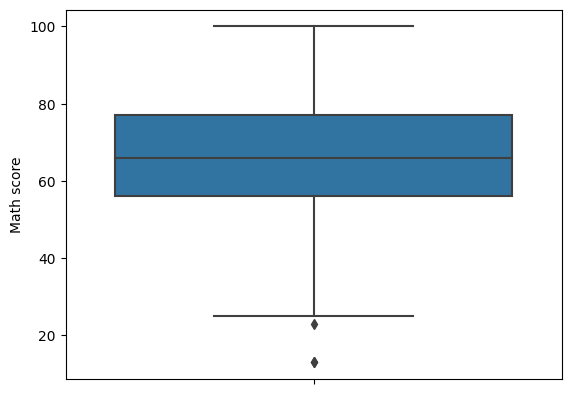

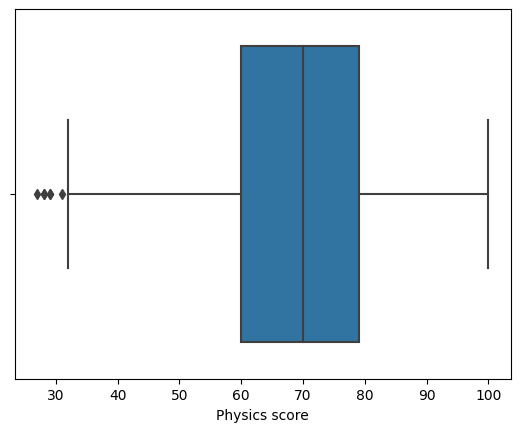

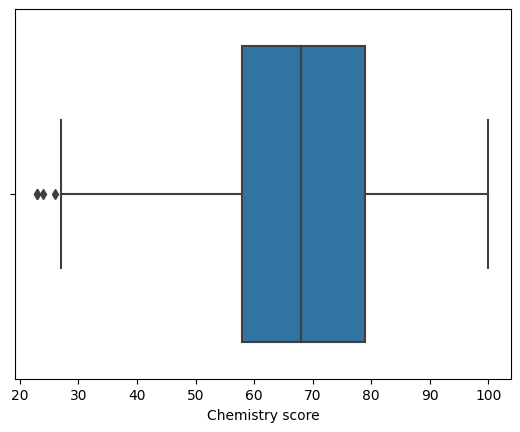

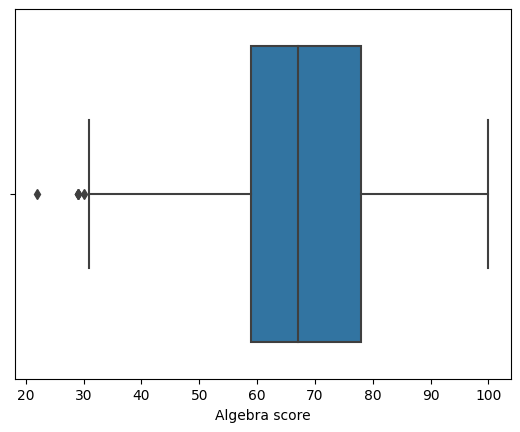

In [ ]:
# 8. Detectar outliers.
sns.boxplot(y = df['Math score'])
plt.show()
sns.boxplot(x = df['Physics score'])
plt.show()
sns.boxplot(x = df['Chemistry score'])
plt.show()
sns.boxplot(x = df['Algebra score'])
plt.show()

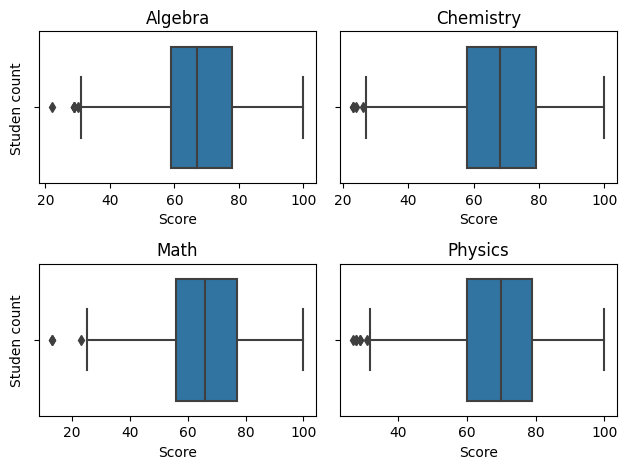

In [ ]:
listado_columnas = ['Algebra score', 'Chemistry score', 'Math score', 'Physics score']

fig, axes = plt.subplots(2, 2)

for i in range(len(listado_columnas)):
  plt.subplot(2, 2, i+1)
  sns.boxplot(x = df[listado_columnas[i]])
  plt.title(list(listado_columnas[i].split())[0])
  if i%2 ==0 : # Cuenta al revés agujas del reloj.
   plt.ylabel('Studen count')
  plt.xlabel('Score')
  
fig.tight_layout() # Muestra gráficos sin que se superpongan

In [ ]:
print(f'Before: {df.Lunch.count()} rows.\n')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 
print(f'\nAfter: {df.Lunch.count()} rows.')

Before: 993 rows.

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64

After: 984 rows.
/tmp/ipykernel_102/2706459287.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_102/2706459287.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


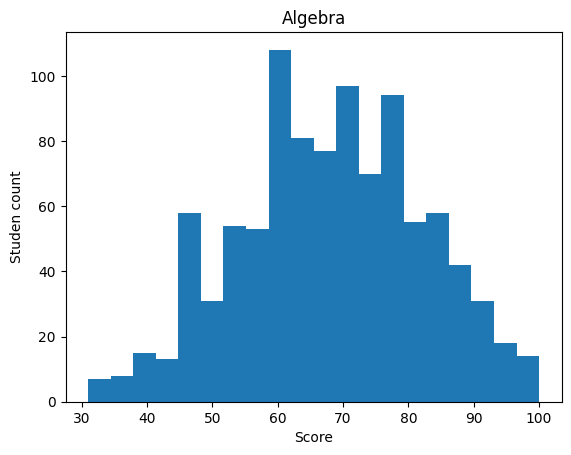

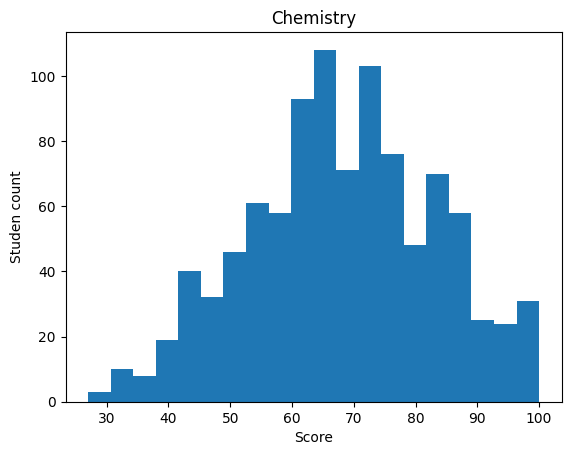

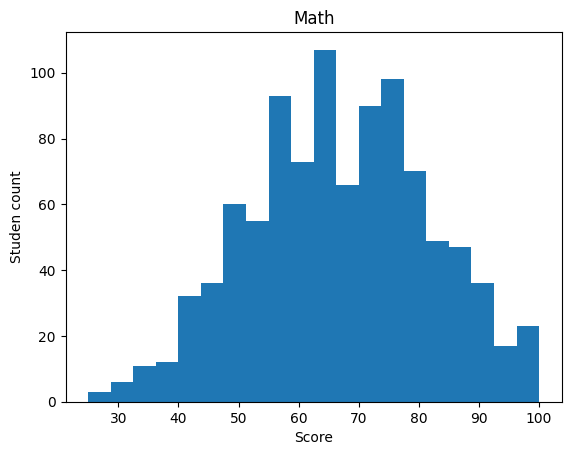

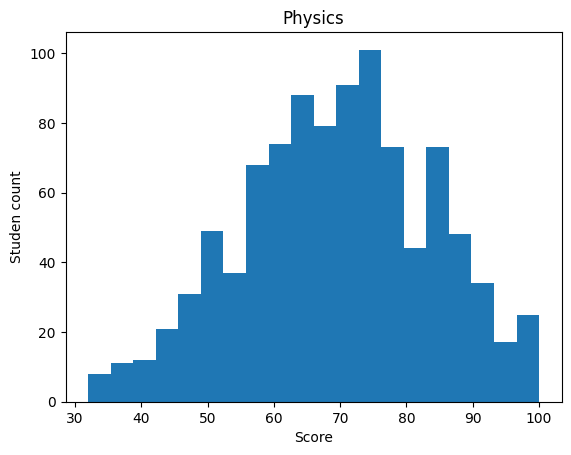

In [ ]:
# 9. Encontrar frecuencias y correlaciones.
plt.hist(df['Algebra score'], bins = 20)
plt.title('Algebra')
plt.ylabel('Studen count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Chemistry score'], bins = 20)
plt.title('Chemistry')
plt.ylabel('Studen count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Math score'], bins = 20)
plt.title('Math')
plt.ylabel('Studen count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Physics score'], bins = 20)
plt.title('Physics')
plt.ylabel('Studen count')
plt.xlabel('Score')
plt.show()



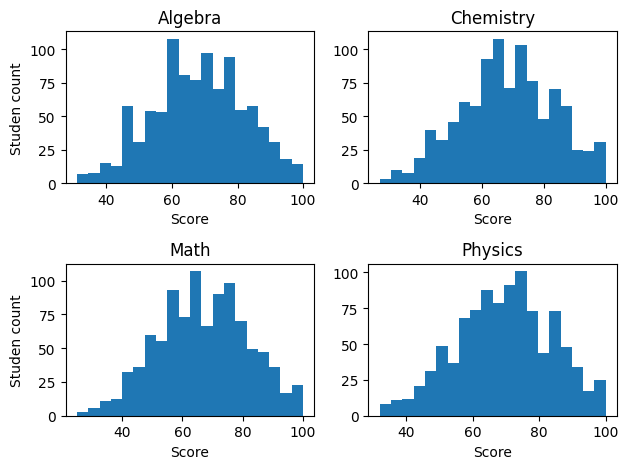

In [ ]:
listado_columnas = ['Algebra score', 'Chemistry score', 'Math score', 'Physics score']

fig, axes = plt.subplots(2, 2)

for i in range(len(listado_columnas)):
  plt.subplot(2, 2, i+1)
  plt.hist(df[listado_columnas[i]], bins = 20)
  plt.title(list(listado_columnas[i].split())[0])
  if i%2 == 0:
   plt.ylabel('Studen count')
  plt.xlabel('Score')
  
fig.tight_layout() # Muestra gráficos sin que se superpongan



In [ ]:
# Correlación entre los datos = Mapas de calor
c = df.corr()
print(c)

                 Math score  Physics score  Chemistry score  Algebra score
Math score         1.000000       0.812055         0.798312       0.916674
Physics score      0.812055       1.000000         0.951536       0.968358
Chemistry score    0.798312       0.951536         1.000000       0.964652
Algebra score      0.916674       0.968358         0.964652       1.000000


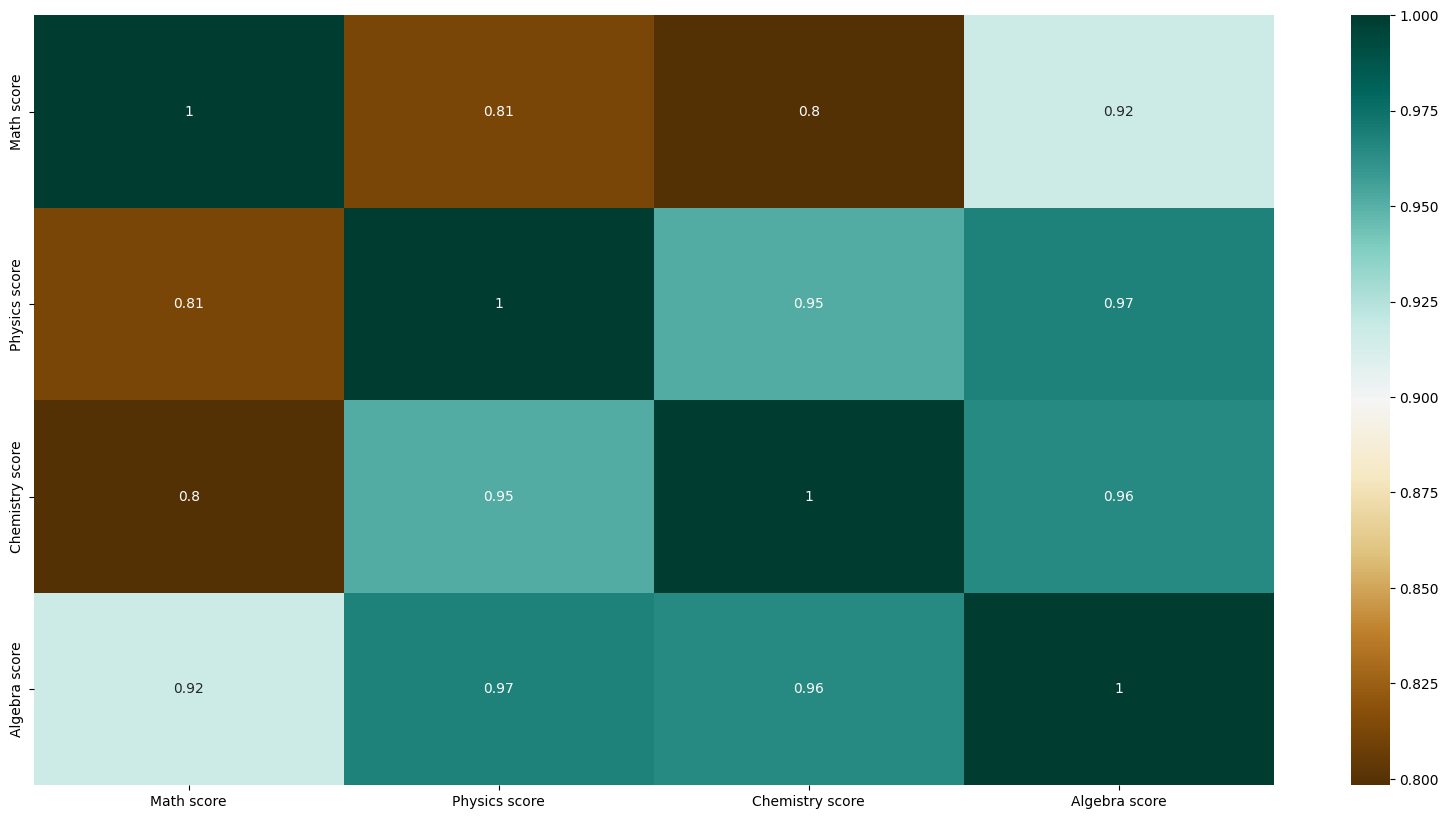

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(c,cmap = "BrBG", annot = True) # annot imprime etiqueta en gráficos.
plt.show()

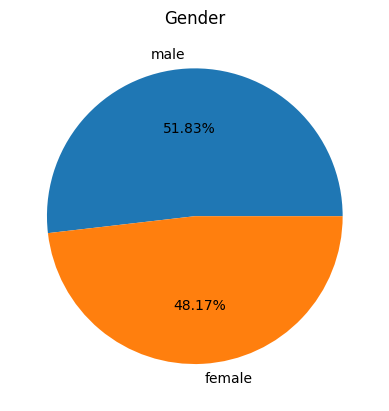

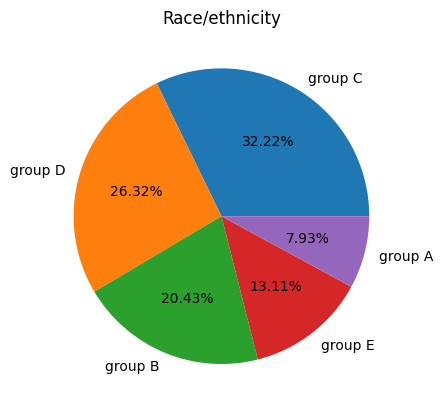

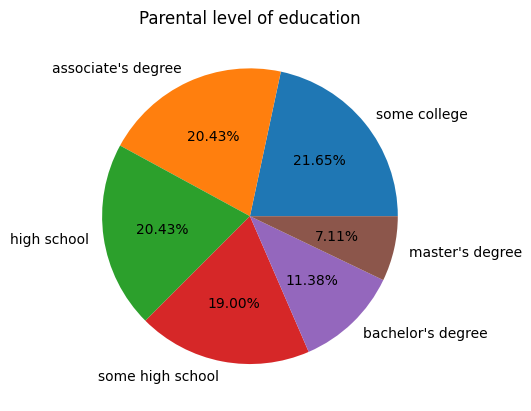

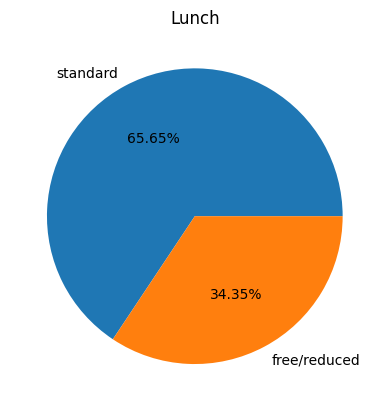

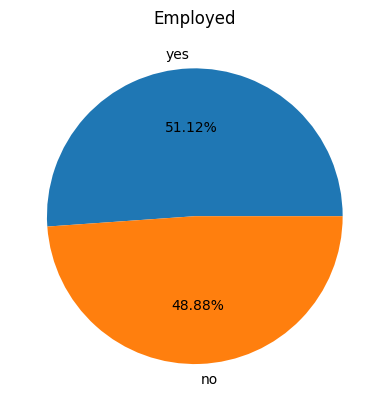

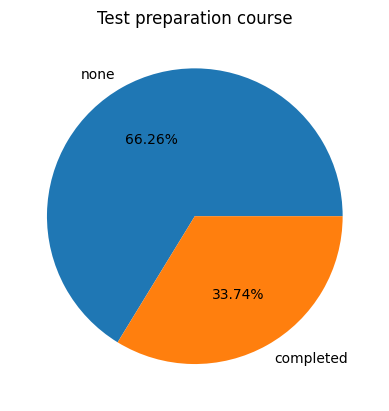

In [ ]:
# pandas.value_count() devuelve una Serie con valores únicos en orden descendente de frecuencia.
labels = df['Gender'].value_counts().index # Guardo el contenido de la columna.and
sizes = df['Gender'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.title('Gender')
plt.show()

labels = df['Race/ethnicity'].value_counts().index # Guardo el contenido de la columna.and
sizes = df['Race/ethnicity'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.title('Race/ethnicity')
plt.show()

labels = df['Parental level of education'].value_counts().index # Guardo el contenido de la columna.and
sizes = df['Parental level of education'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.title('Parental level of education')
plt.show()

labels = df['Lunch'].value_counts().index # Guardo el contenido de la columna.and
sizes = df['Lunch'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.title('Lunch')
plt.show()

labels = df['Employed'].value_counts().index # Guardo el contenido de la columna.and
sizes = df['Employed'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.title('Employed')
plt.show()

labels = df['Test preparation course'].value_counts().index # Guardo el contenido de la columna.and
sizes = df['Test preparation course'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.title('Test preparation course')
plt.show()






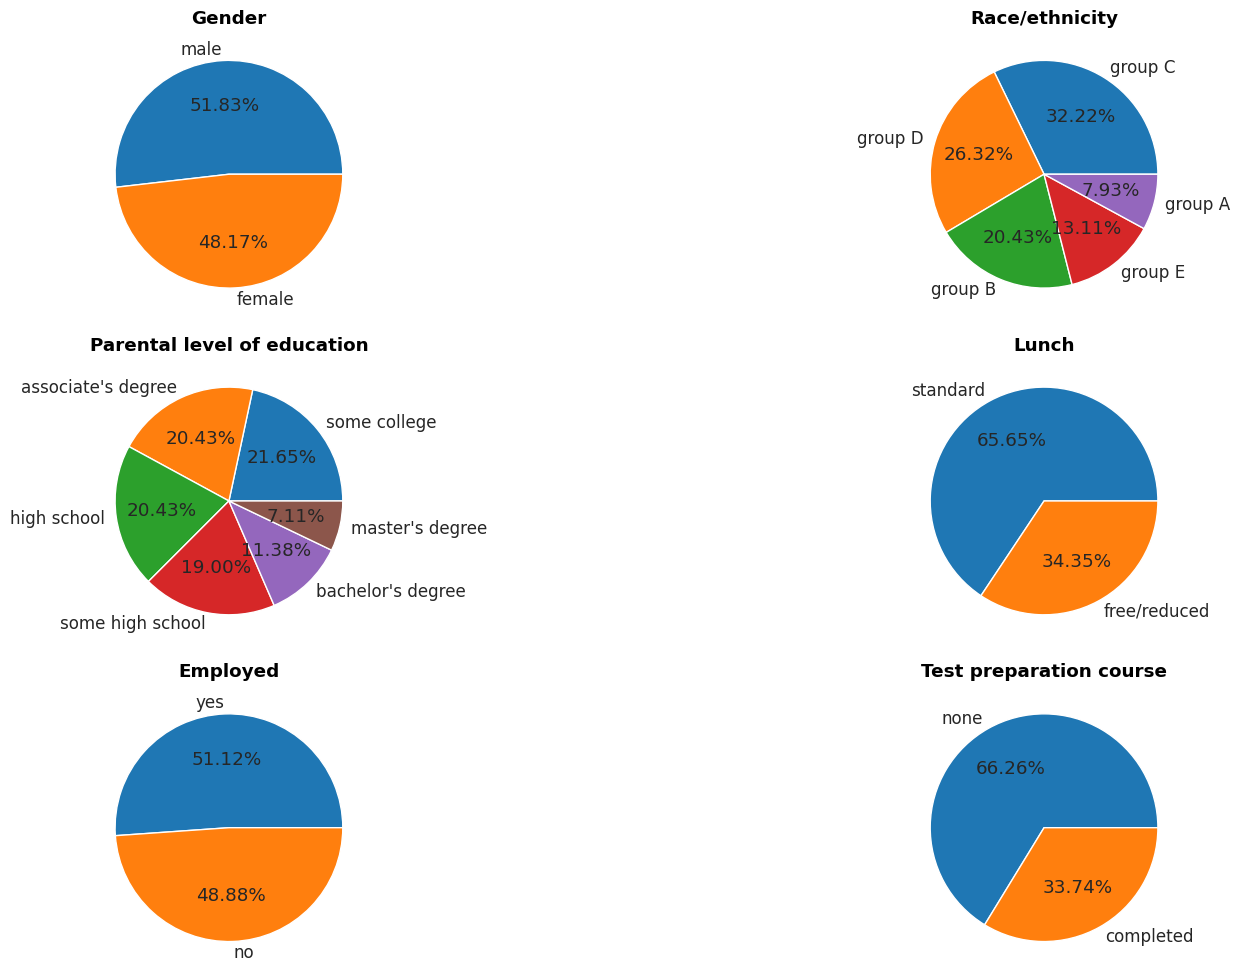

In [ ]:
listado_columnas_2 = ['Gender', 'Race/ethnicity', 'Parental level of education'
, 'Lunch', 'Employed', 'Test preparation course']

fig, axes = plt.subplots(3, 2, figsize = (20, 10))

sns.set(font_scale=1.1)

for i in range(len(listado_columnas_2)):
 plt.subplot(3, 2, i+1)
 labels = df[listado_columnas_2[i]].value_counts().index 
 sizes = df[listado_columnas_2[i]].value_counts()
 plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
 plt.title(listado_columnas_2[i], fontweight="bold")

fig.tight_layout()


In [ ]:
print(sizes)
# print(labels)

none         652
completed    332
Name: Test preparation course, dtype: int64


##  Answering questions / Respondiendo preguntas.

### Is there a relationship between the average grades obtained and having taken the preparatory course? / ¿Existe una relación entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio?

In [ ]:
df['Average score'] = df.mean(axis = 1)
# axis = 1 hace que aplique la función sobre los valores numéricos de la fila en lugar de las columnas.
# 1 es eje horizontal
# 0 es eje vertical
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


In [ ]:
yes = df[df['Test preparation course'] == 'completed']
no = df[df['Test preparation course'] == 'none']

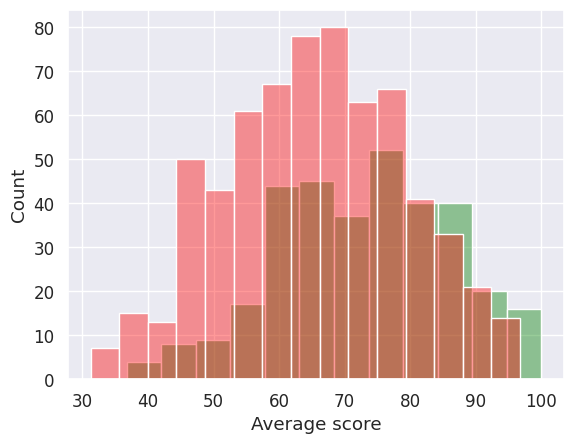

In [ ]:
sns.histplot(yes['Average score'], color = 'green', alpha = 0.4, fill =True)
sns.histplot(no['Average score'], color = 'red', alpha = 0.4, fill =True)
plt.show()


In [ ]:
print('They took the course:', yes['Test preparation course'].count())
print('They did not take the course:', no['Test preparation course'].count())

They took the course: 332
They did not take the course: 652


Conclusion: Although the number of students who did not take the preparatory course is nearly double that of those who have completed it, this difference is not significantly reflected in the average grades.

Conclusión: si bien la cantidad de alumnos que no realizó el curso preparatorio casi duplica a la de quienes lo han completado, esta diferencia no se ve reflejada significativamente en el promedio de notas.

It is recommended to audit the course contents in order to achieve an improvement in academic performance and increase student engagement.

Se recomienda auditar los contenidos del curso, a fines de lograr una mejora en el rendimiento académico y aumentar el interés del alumnado.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ace137c-e965-4bee-80f9-3c8ce1bd424f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>